In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers


In [6]:
model = models.Sequential([
    #layer 1
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    #layer2
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [13]:
model1 = tf.keras.Model(
        inputs=model.input, 
        outputs=model.layers[2].output
    )

In [22]:
import cv2
import numpy as np
img = cv2.imread('virat.jpeg')
    
    # Convert BGR to RGB (OpenCV reads in BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize image
img = cv2.resize(img, (224, 224))
    
    # Normalize pixel values
img = img.astype('float32') / 255.0
    
    # Add batch dimension
img = np.expand_dims(img, axis=0)


1/1 [==============================] - 0s 24ms/step


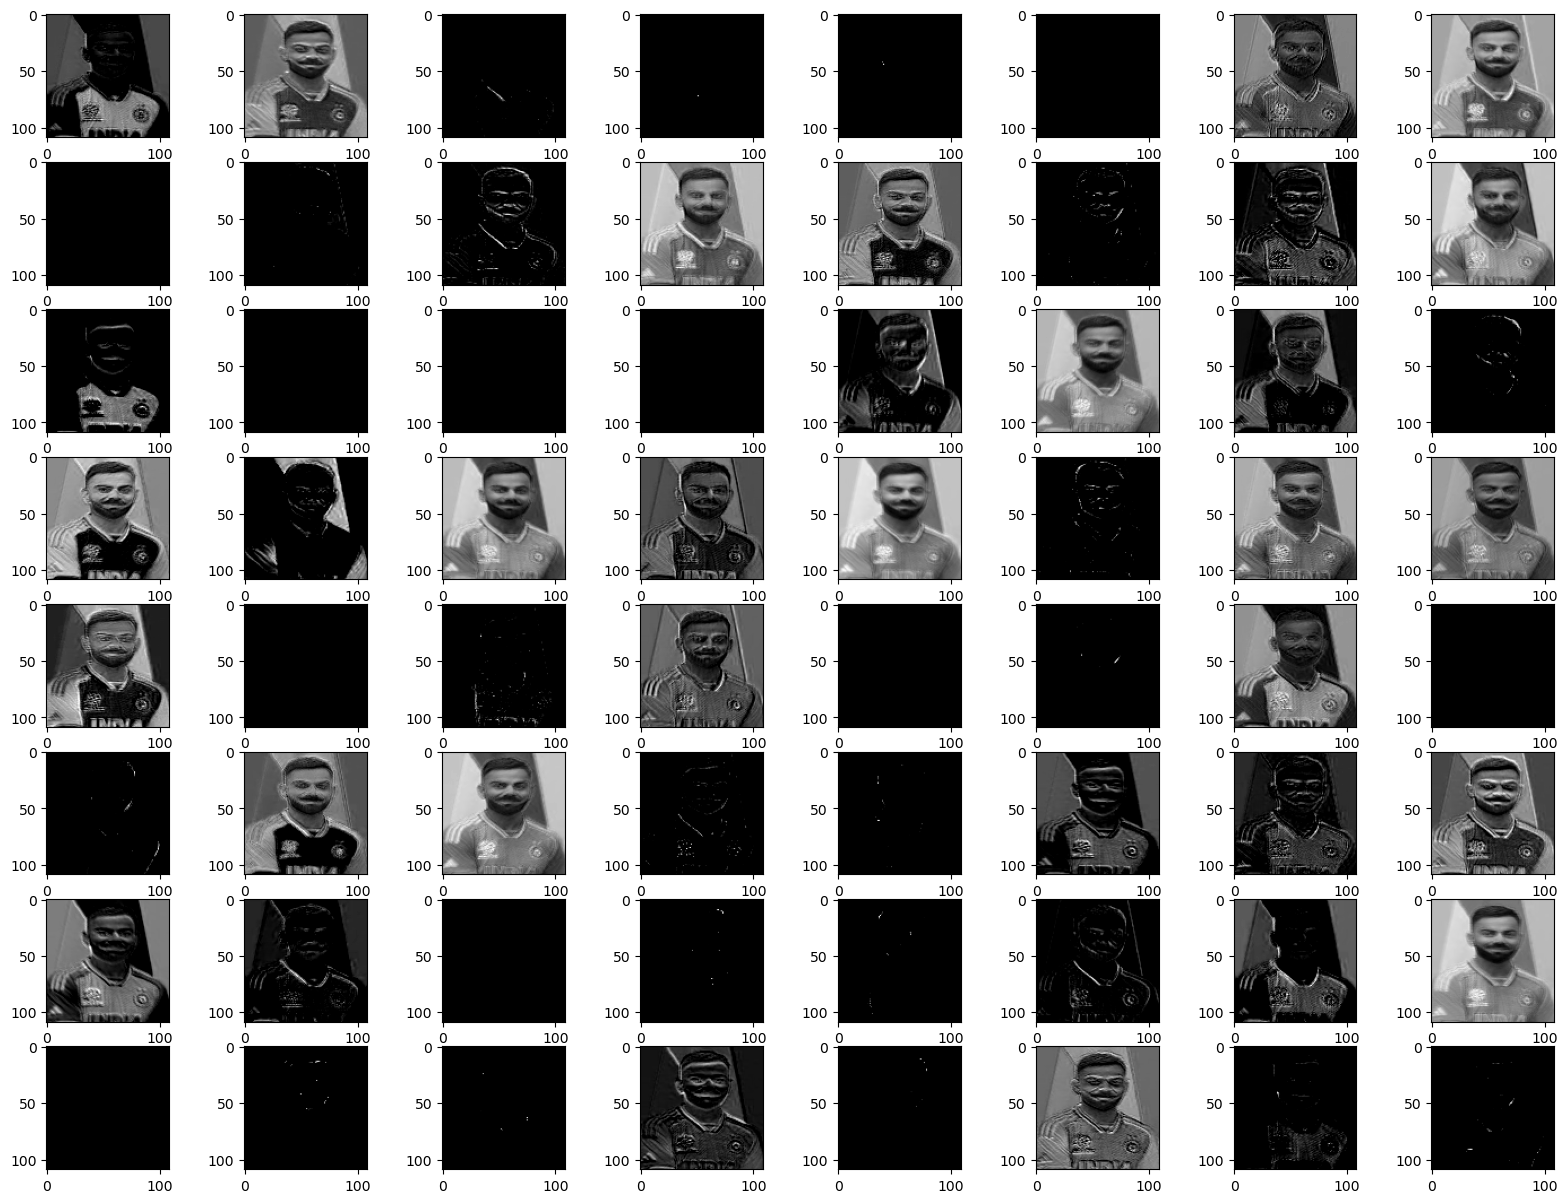

In [23]:
import matplotlib.pyplot as plt 
#calculating features_map
features = model1.predict(img)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()